<a href="https://colab.research.google.com/github/ne-adrita/Predicting-Sleep-Quality-through-Behavioral-Pattern-Recognition/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 KNN Regressor Evaluation
MAE: 2.6046
MSE: 9.48948
R² Score: -0.16895748900577745

📊 KNN Classifier Evaluation
Accuracy: 0.378
Classification Report:
               precision    recall  f1-score   support

        Poor       0.42      0.59      0.49       394
     Average       0.31      0.28      0.29       310
        Good       0.37      0.19      0.25       296

    accuracy                           0.38      1000
   macro avg       0.36      0.36      0.35      1000
weighted avg       0.37      0.38      0.36      1000

Confusion Matrix:
 [[234 108  52]
 [179  87  44]
 [150  89  57]]


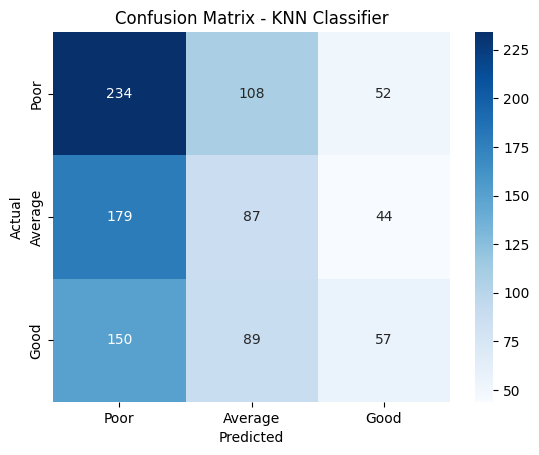

In [1]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/sleep_pattern_analysis_datasett.csv')

# 🧹 Step 3: Clean data
df.drop('Person_ID', axis=1, inplace=True)
df['Work Hours (hrs/day)'] = pd.to_numeric(df['Work Hours (hrs/day)'], errors='coerce')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.dropna(inplace=True)

# 🎯 Step 4: Features and target
X = df.drop('Sleep Quality', axis=1)
y = df['Sleep Quality']

# ⚖ Step 5: Scale features (KNN is distance-based, so scaling is essential)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 🧠 Step 6A: KNN Regressor
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_r, y_train_r)
y_pred_r = knn_reg.predict(X_test_r)

print("📊 KNN Regressor Evaluation")
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))

# -----------------------------
# 🧠 Step 6B: KNN Classifier
# -----------------------------
# Convert target to 3 categories: Poor (0), Average (1), Good (2)
y_class = y.apply(lambda x: 0 if x <= 4 else (1 if x <= 7 else 2))
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_c, y_train_c)
y_pred_c = knn_clf.predict(X_test_c)

print("\n📊 KNN Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c, target_names=["Poor", "Average", "Good"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# 🔍 Confusion Matrix Plot
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=["Poor", "Average", "Good"],
            yticklabels=["Poor", "Average", "Good"])
plt.title("Confusion Matrix - KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
